In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
smallblock = np.matrix([[1,1,1,1,1],
              [1,0,0,0,1],
              [1,0,1,0,1],
              [1,0,0,0,1],
              [1,1,1,1,1]])
bigblock = np.matrix([[1,1,1,1,1,1,1],
            [1,0,0,0,0,0,1],
            [1,0,1,1,1,0,1],
            [1,0,1,1,1,0,1],
            [1,0,1,1,1,0,1],
            [1,0,0,0,0,0,1],
            [1,1,1,1,1,1,1]])
            

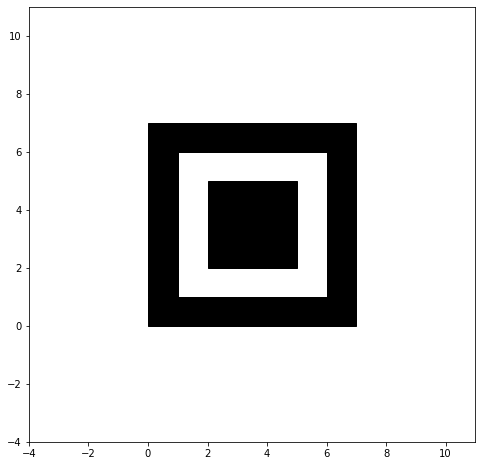

(7, 7)

In [3]:
def Plot(matrix,padding = False):
    ratio = matrix.shape[1]/matrix.shape[0]
    plt.figure(figsize=(8*ratio,8))
    plt.xlim(-4*padding,matrix.shape[1]+4*padding)
    plt.ylim(-4*padding,matrix.shape[0]+4*padding)
    ax = plt.gca()
    for i in range(matrix.shape[1]):
        for j in range(matrix.shape[0]):
            if matrix[j,i]:
                # Black is 1 on odd rows
                ax.add_patch(plt.Rectangle((i,len(matrix)-1-j),1,1,color = 'black'))
            
            
            
            
#             if j%2 == 0:
#                 if not matrix[j][i]:
#                     # Black is 0 on even rows
#                     ax.add_patch(plt.Rectangle((i,len(matrix)-1-j),1,1,color = 'black'))
#             else:
#                 if matrix[j][i]:
#                     # Black is 1 on odd rows
#                     ax.add_patch(plt.Rectangle((i,len(matrix)-1-j),1,1,color = 'black'))
    plt.show()
Plot(bigblock,True)
bigblock.shape

In [7]:
V = 1
N = 4*V+17
matrix = np.matrix(np.zeros((N,N)))
# matrix = np.matrix([[round(random.random()) for i in range(N)] for j in range(N)])
#CORNERS
matrix[:8,:8] = np.zeros((8,8))
matrix[:7,:7] = bigblock
matrix[:8,-8:] = np.zeros((8,8))
matrix[:7,-7:] = bigblock
matrix[-8:,:8] = np.zeros((8,8))
matrix[-7:,:7] = bigblock

# TIMING, i think
matrix[6,8:-8] = [1] + [0,1]*2*V
matrix[8:-8,6] = [[1]] + [[0],[1]]*2*V

# one specific pixel
matrix[-8,8] = 1

In [8]:
#for now assume V = 1 so no smallblock/alignment nonsense
#alphanumeric mode: 0010
mode = "0010"
print(mode)
text = "trans people uwu"
charcount = len(text)
ccbinary = "0"*(9-len(str(bin(charcount))[2:]))+str(bin(charcount))[2:] #version 1 alphanumeric: length is 9 bits
print(ccbinary)
encoded = mode + ccbinary + encoder(text)
print(encoded)
# print(len(encoded))
# print("total bits actually needed:",19*8)
encoded += max(4,len(encoded) - 19*8)*"0"
if len(encoded)%8 != 0:
    encoded += (8-len(encoded)%8)*"0"
# print(len(encoded))
i = 0
while len(encoded) < 19*8:
    if i%2 == 0:
        encoded += "11101100"
    else:
        encoded += "00010001"
    i += 1
print(encoded)
message = [int(encoded[8*i:8*i+8],2) for i in range(19)]
print("The message polynomial has coefficients:",message)
n = 7 #number of error correction codewords for 1-L
generator = [1] #polynomial of x - 1
for i in range(n):
    generator = polymult(generator,[GF[0],GF[i]])
#print([GF.index(g) for g in generator])
print("The generator polynomial has coefficients:",generator)

errorcodes = polydivide(message,generator)
print("The error codewords are:",errorcodes)
fullbin = "".join(["0"*(8-len(str(bin(e))[2:]))+str(bin(e))[2:] for e in (message+errorcodes)])
print(len(fullbin))
print(fullbin)

0010
000010000
00100000100001010011010000111011001101000100001000111001110001010001011101111111100111001010110111110
00100000100001010011010000111011001101000100001000111001110001010001011101111111100111001010110111110000000000001110110000010001111011000001000111101100
The message polynomial has coefficients: [32, 133, 52, 59, 52, 66, 57, 197, 23, 127, 156, 173, 240, 0, 236, 17, 236, 17, 236]
The generator polynomial has coefficients: [1, 127, 122, 154, 164, 11, 68, 117]
The error codewords are: [11, 56, 166, 173, 33, 117, 9]
208
0010000010000101001101000011101100110100010000100011100111000101000101110111111110011100101011011111000000000000111011000001000111101100000100011110110000001011001110001010011010101101001000010111010100001001


208
208


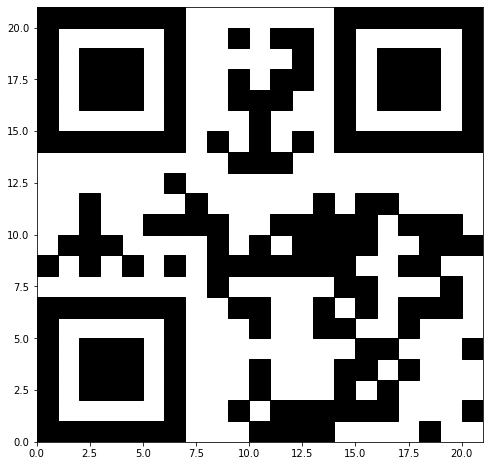

In [9]:
#begin the train!!!
print(len(fullbin))
placed = 0
pointer = [20,20]
while pointer[0] > 8: 
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] -= 1
    
pointer[0] += 1
pointer[1] -= 2

while pointer[0] < 21:
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] += 1

pointer[0] -= 1
pointer[1] -= 2

while pointer[0] > 8: 
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] -= 1

pointer[0] += 1
pointer[1] -= 2

while pointer[0] < 21:
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] += 1
    
pointer[0] -= 1
pointer[1] -= 2

while pointer[0] > -1:
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] -= 1
    if pointer[0] == 6:
        pointer[0] -= 1
    
pointer[0] += 1
pointer[1] -= 2

while pointer[0] < 21:
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] += 1
    if pointer[0] == 6:
        pointer[0] += 1

pointer[0] -= 9
pointer[1] -= 2
while pointer[0] > 8:
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] -= 1

pointer[1] -= 3
pointer[0] += 1

while pointer[0] < 13:
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] += 1
    
pointer[0] -= 1
pointer[1] -= 2
while pointer[0] > 8:
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] -= 1

pointer[1] -= 2
pointer[0] += 1

while pointer[0] < 13:
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] -= 1
    matrix[pointer[0],pointer[1]] = fullbin[placed] 
    placed += 1
    pointer[1] += 1
    pointer[0] += 1
print(placed)
Plot(matrix)



In [11]:
#masking 
count = 0

def mask(x,y,method = 0):
        return [(x+y)%2 == 0, y%2 == 0, x % 3 == 0, (x+y)%3 == 0, (y//2 + x//3) % 2 == 0, (x*y)%2 + (x*y)%3 == 0, ((x*y)%2 + (x*y)%3)%2 == 0, ((x+y)%2 + (x*y)%3)%2 == 0 ][method]
    

for method in range(8):
    newmat = matrix.copy()
    for x in range(21):
        for y in range(21):
                if (y <= 8 and x >= 9 and x <= 12 and y != 6) or (x <= 8 and x != 6 and y > 8 and y < 13) or (x>8 and y > 8): 
                    if mask(x,y,method):
                        newmat[y,x] = 1 - newmat[y,x]
                        count += 1






In [12]:
#L error
errorcorrection = "01"
#lets assume 7 had the best skill score for now
method = "111"
format5 = [int(i) for i in (errorcorrection + method)]
formatgen = [1,0,1,0,0,1,1,0,1,1,1] #QR spec
print(format5)
newformat = format5.copy()
while len(newformat) < 15:
    newformat.append(0)
while newformat[0] == 0:
    newformat.pop(0)
formatremainder = polydivide(newformat,formatgen)
while len(formatremainder) < 10:
    formatremainder = [0] + formatremainder
print(formatremainder)
fullformat = int("".join([str(i) for i in format5 + formatremainder]),2)
formatbin = bin(fullformat ^ 21522)[2:] #QR spec
print(formatbin)
#this is wrong, sad
formatbin = "110100101110110"

[0, 1, 1, 1, 1]
[0, 1, 1, 1, 1, 0, 0, 0, 0, 0]
110100111110010


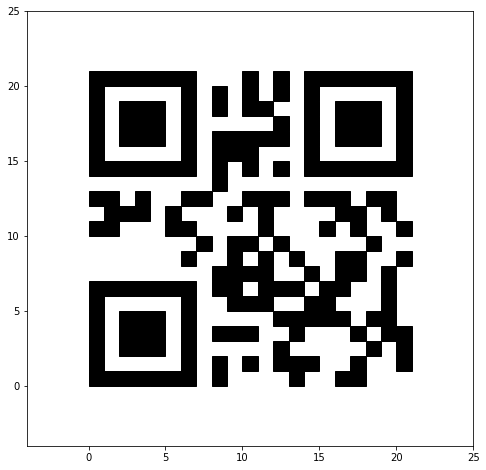

In [13]:
pointerlist1 = [[8,0],[8,1],[8,2],[8,3],[8,4],[8,5],[8,7],[8,8],[7,8],[5,8],[4,8],[3,8],[2,8],[1,8],[0,8]]
pointerlist2 = [[20,8],[19,8],[18,8],[17,8],[16,8],[15,8],[14,8],[8,13],[8,14],[8,15],[8,16],[8,17],[8,18],[8,19],[8,20]]         
for i,point in enumerate(pointerlist1):
    newmat[point[0],point[1]] = int(formatbin[i])
for i,point in enumerate(pointerlist2):
    newmat[point[0],point[1]] = int(formatbin[i])


Plot(newmat,True)

In [4]:
#if we were to use alphanumaric mode, these functions would be useful
def encoder(message):
    charlist = ["0","1","2","3","4","5","6","7","8","9","A","B","C","D","E","F","G","H","I","J","K","L","M","N","O","P","Q","R","S","T","U","V","W","X","Y","Z"," ","$","%","*","+","-",".","/",":"]        
    encoded = []
    message = message.upper()
    
    for i in range(len(message)//2):
        c1 = charlist.index(message[2*i])
        c2 = charlist.index(message[2*i+1])
        encoded += [45*c1 + c2]
    encbin = "".join(["0"*(11-len(str(bin(e))[2:]))+str(bin(e))[2:] for e in encoded])
    if len(message)%2 == 1:
        encbin += "0"*(6-len(str(bin(charlist.index(message[-1])))[2:]))+str(bin(charlist.index(message[-1])))[2:]
    return encbin

    
len(encoder("peepee1q-"))
# len(encoder("github.com/aislingheanuea"))
# len("https://youtu.be/dQw4w9WgXcQ")
# len("youtu.be/dQw4w9WgXcQ")
        

50

In [6]:
#lets make the power talbe of the Galois Field GF(256) real quick
#"real quick" she said -.-
GF = [1]
for i in range(1,256):
    if 2*GF[-1] < 256:
        GF.append(2*GF[-1])
    else:
        GF.append(2*GF[-1]^285)
#print(GF)
mult = lambda a,b: GF[(GF.index(a) + GF.index(b))%255] if a != 0 and b != 0 else 0
add = lambda a,b: a^b
#multiplying polynomials
def polymult(l1,l2):
    #inputs are lists with coefficients of x^n ... x^0
    #reverse the lists
    rl1 = l1[::-1]
    rl2 = l2[::-1]
    routput = [0]*2*max(len(l1),len(l2))
    for index1,num1 in enumerate(rl1):
        #print(index1,num1)
        for index2,num2 in enumerate(rl2):
            routput[index1+index2] = add(routput[index1+index2],mult(num1,num2))
    #unreverse the list
    output = routput[::-1]
    #delete any leading zeros
    while output != [] and output[0] == 0:
        output.pop(0)
    return output
        
def polydivide(message,generator): #we want to divide message by gen
    gen = generator.copy()
    n = len(gen)-1 # 7
    #multiply the message by x^7
    remainder = message.copy()
    remainder += [0]*n
    gen += [0]*(len(remainder)-len(generator))
    while(len(remainder) > n):
        remainder = [add(remainder[i],polymult([remainder[0]],gen)[i]) for i in range(len(remainder))]
        gen.pop(-1) #divide by x
        while remainder != [] and remainder[0] == 0: #remove leading zeros
            remainder.pop(0)
    return remainder
    
print(polymult([0,1,5,67,3],[1,0,1]))


[1, 5, 66, 6, 67, 3]
